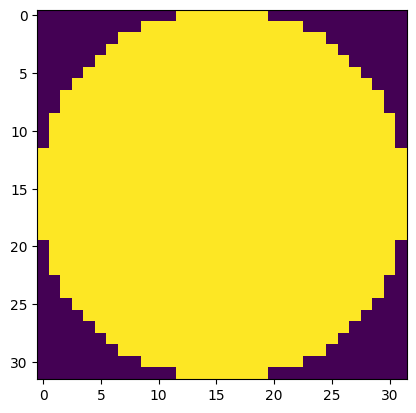

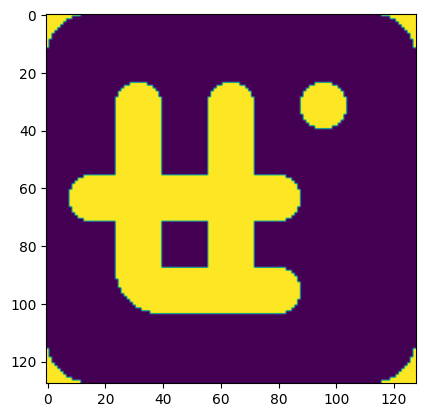

In [27]:
import numpy as np
import matplotlib.pyplot as plt

logo_str = '''
.......
.x.x.x.
.x.x...
xxxxx..
.x.x...
.2xxx..
.......
'''

grid = []
grid2 = []
for line in logo_str.strip().split('\n'):
    grid.append([1 if c == 'x' else 0 for c in line])
    grid2.append([1 if c == '2' else 0 for c in line])

grid = np.array(grid, dtype=np.uint8)
grid2 = np.array(grid2, dtype=np.uint8)

vu = np.mgrid[:16, :16] - 15/2
v, u = vu
circ = (v**2 + u**2) < 8**2

vu = np.mgrid[:32, :32] - 31/2
v, u = vu
circ2x = (v**2 + u**2) <= 16**2
plt.imshow(circ2x)
plt.show()


out = np.zeros((128, 128), dtype=np.uint8)
for j in range(7):
    for i in range(7):
        if grid[j,i]:
            out[8+16*j:24+16*j, 8+16*i:24+16*i] |= circ
        if grid2[j,i]:
            out[8+16*j:24+16*j, 8+16*i:24+16*i] |= circ2x[16:, :16]

out[32:88, 24:40] = 1
out[32:96, 56:72] = 1
out[88:104, 40:80] = 1
out[56:72, 16:80] = 1
out[:16, :16] = ~circ2x[:16, :16]
out[:16, -16:] = ~circ2x[:16, -16:]
out[-16:, :16] = ~circ2x[-16:, :16]
out[-16:, -16:] = ~circ2x[-16:, -16:]


plt.imshow(out)
plt.show()

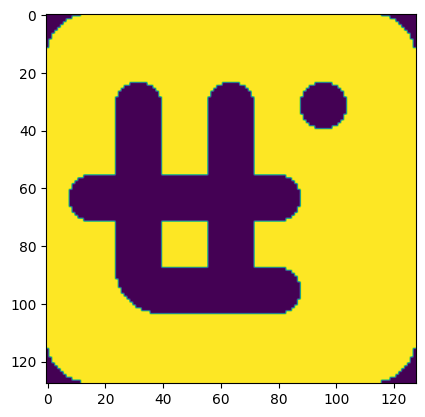

In [32]:
plt.imshow(out^1)

In [41]:
import math

def writetable(name, data):
    hexdigits = 1# math.ceil(math.log(max(data.reshape(-1)), 16))
    bits = 1 #math.ceil(math.log(max(data), 2))
    with open(f"../data/{name}.hex", "w") as f:
        for d in data:
            f.write(" ".join(f"{x:0{hexdigits}x}" for x in d))
            f.write("\n")
    data = data.reshape(-1)
    with open(f"../data/{name}.pla", "wb") as f:
        inbits = math.ceil(math.log(len(data), 2))
        f.write(f".i {inbits}\n.o {bits}\n.p {len(data)}\n".encode())
        for i, x in enumerate(data):
            f.write(f"{i:0{inbits}b} {x:0{bits}b}\n".encode())


writetable("logo", out^1)